In [1]:
import numpy as np
from collections import Counter

class Perceptron:
    def __init__(self, weights, bias=1, learning_rate=0.3):
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate

    @staticmethod
    def unit_step_function(x):
        if x <= 0:
            return 0
        else:
            return 1

    def __call__(self, in_data):
        in_data = np.concatenate((in_data, [self.bias]))
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)

    def adjust(self, target_result, in_data):
        if not isinstance(in_data, np.ndarray):
            in_data = np.array(in_data)
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate((in_data, [self.bias]))
            correction = error * in_data * self.learning_rate
            self.weights += correction

    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample)  # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation


-1.0 0.5


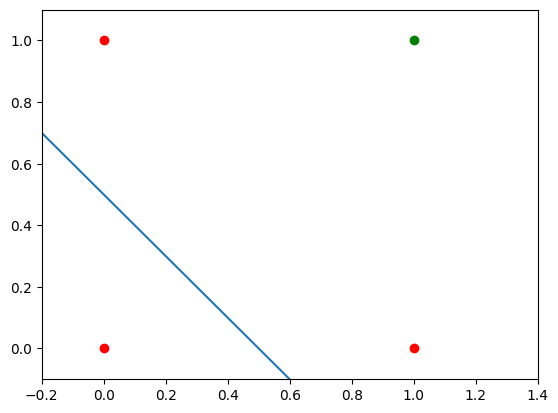

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming you have some data X_train and y_train for training the model
# Here's a simple example
X_train = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_train = np.array([0, 0, 0, 1])

# Train the model
p = LinearRegression()
p.fit(X_train, y_train)

# Plotting the data points
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])

# Calculate slope and intercept
m = -p.coef_[0] / p.coef_[1]
c = -p.intercept_ / p.coef_[1]
print(m, c)

# Plotting the line
ax.plot(X, m * X + c)
plt.show()
